In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_risk = pd.read_csv('risk_score.csv')
data_risk.head(1)

,Unnamed: 0,risk1,risk2,risk3,risk4,risk5,risk6,risk7,risk8,risk9,risk10,risk11,risk12,risk13,risk14,risk15,risk16,risk17,risk18,risk19,risk20,risk21,risk22,risk23,risk24,bin_risk1,bin_risk2,bin_risk3,bin_risk4,bin_risk5,bin_risk6,bin_risk7,bin_risk8,bin_risk9,bin_risk10,bin_risk11,bin_risk12,bin_risk13,bin_risk14,bin_risk15,bin_risk16,bin_risk17,bin_risk18,bin_risk19,bin_risk20,bin_risk21,bin_risk22,bin_risk23,bin_risk24,risk_target,score,material_group_name
0,0,417,699,126,225,201,277,747,108,655,50,789,518,794,182,738,461,976,938,165,688,721,181,374,150,"(366.2, 467.5]","(583.0, 699.0]","(102.9, 189.0]","(216.8, 314.1]","(116.5, 212.6]","(270.5, 384.6]","(707.3, 795.6]","(102.6, 201.8]","(605.4, 702.5]","(2.999, 78.8]","(786.6, 895.1]","(428.4, 528.5]","(793.2, 907.1]","(176.4, 251.7]","(719.6, 796.8]","(394.2, 523.5]","(908.2, 997.0]","(885.5, 998.0]","(107.9, 222.4]","(671.6, 779.2]","(690.6, 821.8]","(109.7, 192.8]","(373.6, 451.5]","(90.9, 197.8]",0,7,材料组1


In [3]:
data_money = pd.read_csv('money_score.csv')
data_money.head(1)

,Unnamed: 0,money1,money2,money3,money4,money5,money6,money7,money8,money9,bin_money1,bin_money2,bin_money3,bin_money4,bin_money5,bin_money6,bin_money7,bin_money8,bin_money9,money_target,score,material_group_name
0,0,21,86,466,287,536,206,191,747,524,"(0.999, 62.8]","(68.7, 186.0]","(429.6, 530.5]","(226.8, 352.1]","(481.5, 577.8]","(182.4, 261.0]","(120.8, 191.8]","(711.3, 812.2]","(464.0, 575.6]",0,20,材料组1


In [4]:
data = pd.merge(data_risk, data_money, on='material_group_name', how='left')
data.head(1)

,Unnamed: 0_x,risk1,risk2,risk3,risk4,risk5,risk6,risk7,risk8,risk9,risk10,risk11,risk12,risk13,risk14,risk15,risk16,risk17,risk18,risk19,risk20,risk21,risk22,risk23,risk24,bin_risk1,bin_risk2,bin_risk3,bin_risk4,bin_risk5,bin_risk6,bin_risk7,bin_risk8,bin_risk9,bin_risk10,bin_risk11,bin_risk12,bin_risk13,bin_risk14,bin_risk15,bin_risk16,bin_risk17,bin_risk18,bin_risk19,bin_risk20,bin_risk21,bin_risk22,bin_risk23,bin_risk24,risk_target,score_x,material_group_name,Unnamed: 0_y,money1,money2,money3,money4,money5,money6,money7,money8,money9,bin_money1,bin_money2,bin_money3,bin_money4,bin_money5,bin_money6,bin_money7,bin_money8,bin_money9,money_target,score_y
0,0,417,699,126,225,201,277,747,108,655,50,789,518,794,182,738,461,976,938,165,688,721,181,374,150,"(366.2, 467.5]","(583.0, 699.0]","(102.9, 189.0]","(216.8, 314.1]","(116.5, 212.6]","(270.5, 384.6]","(707.3, 795.6]","(102.6, 201.8]","(605.4, 702.5]","(2.999, 78.8]","(786.6, 895.1]","(428.4, 528.5]","(793.2, 907.1]","(176.4, 251.7]","(719.6, 796.8]","(394.2, 523.5]","(908.2, 997.0]","(885.5, 998.0]","(107.9, 222.4]","(671.6, 779.2]","(690.6, 821.8]","(109.7, 192.8]","(373.6, 451.5]","(90.9, 197.8]",0,7,材料组1,0,21,86,466,287,536,206,191,747,524,"(0.999, 62.8]","(68.7, 186.0]","(429.6, 530.5]","(226.8, 352.1]","(481.5, 577.8]","(182.4, 261.0]","(120.8, 191.8]","(711.3, 812.2]","(464.0, 575.6]",0,20


In [5]:
# data.rename(columns={'score_x':'risk_score', 'score_y':'money_score'}).head(1)

### 材料定位模型可视化

In [6]:
y = risk_score = data['score_x']
x = money_score = data['score_y']
label = data['material_group_name']

Text(18, 1, '一般物资')

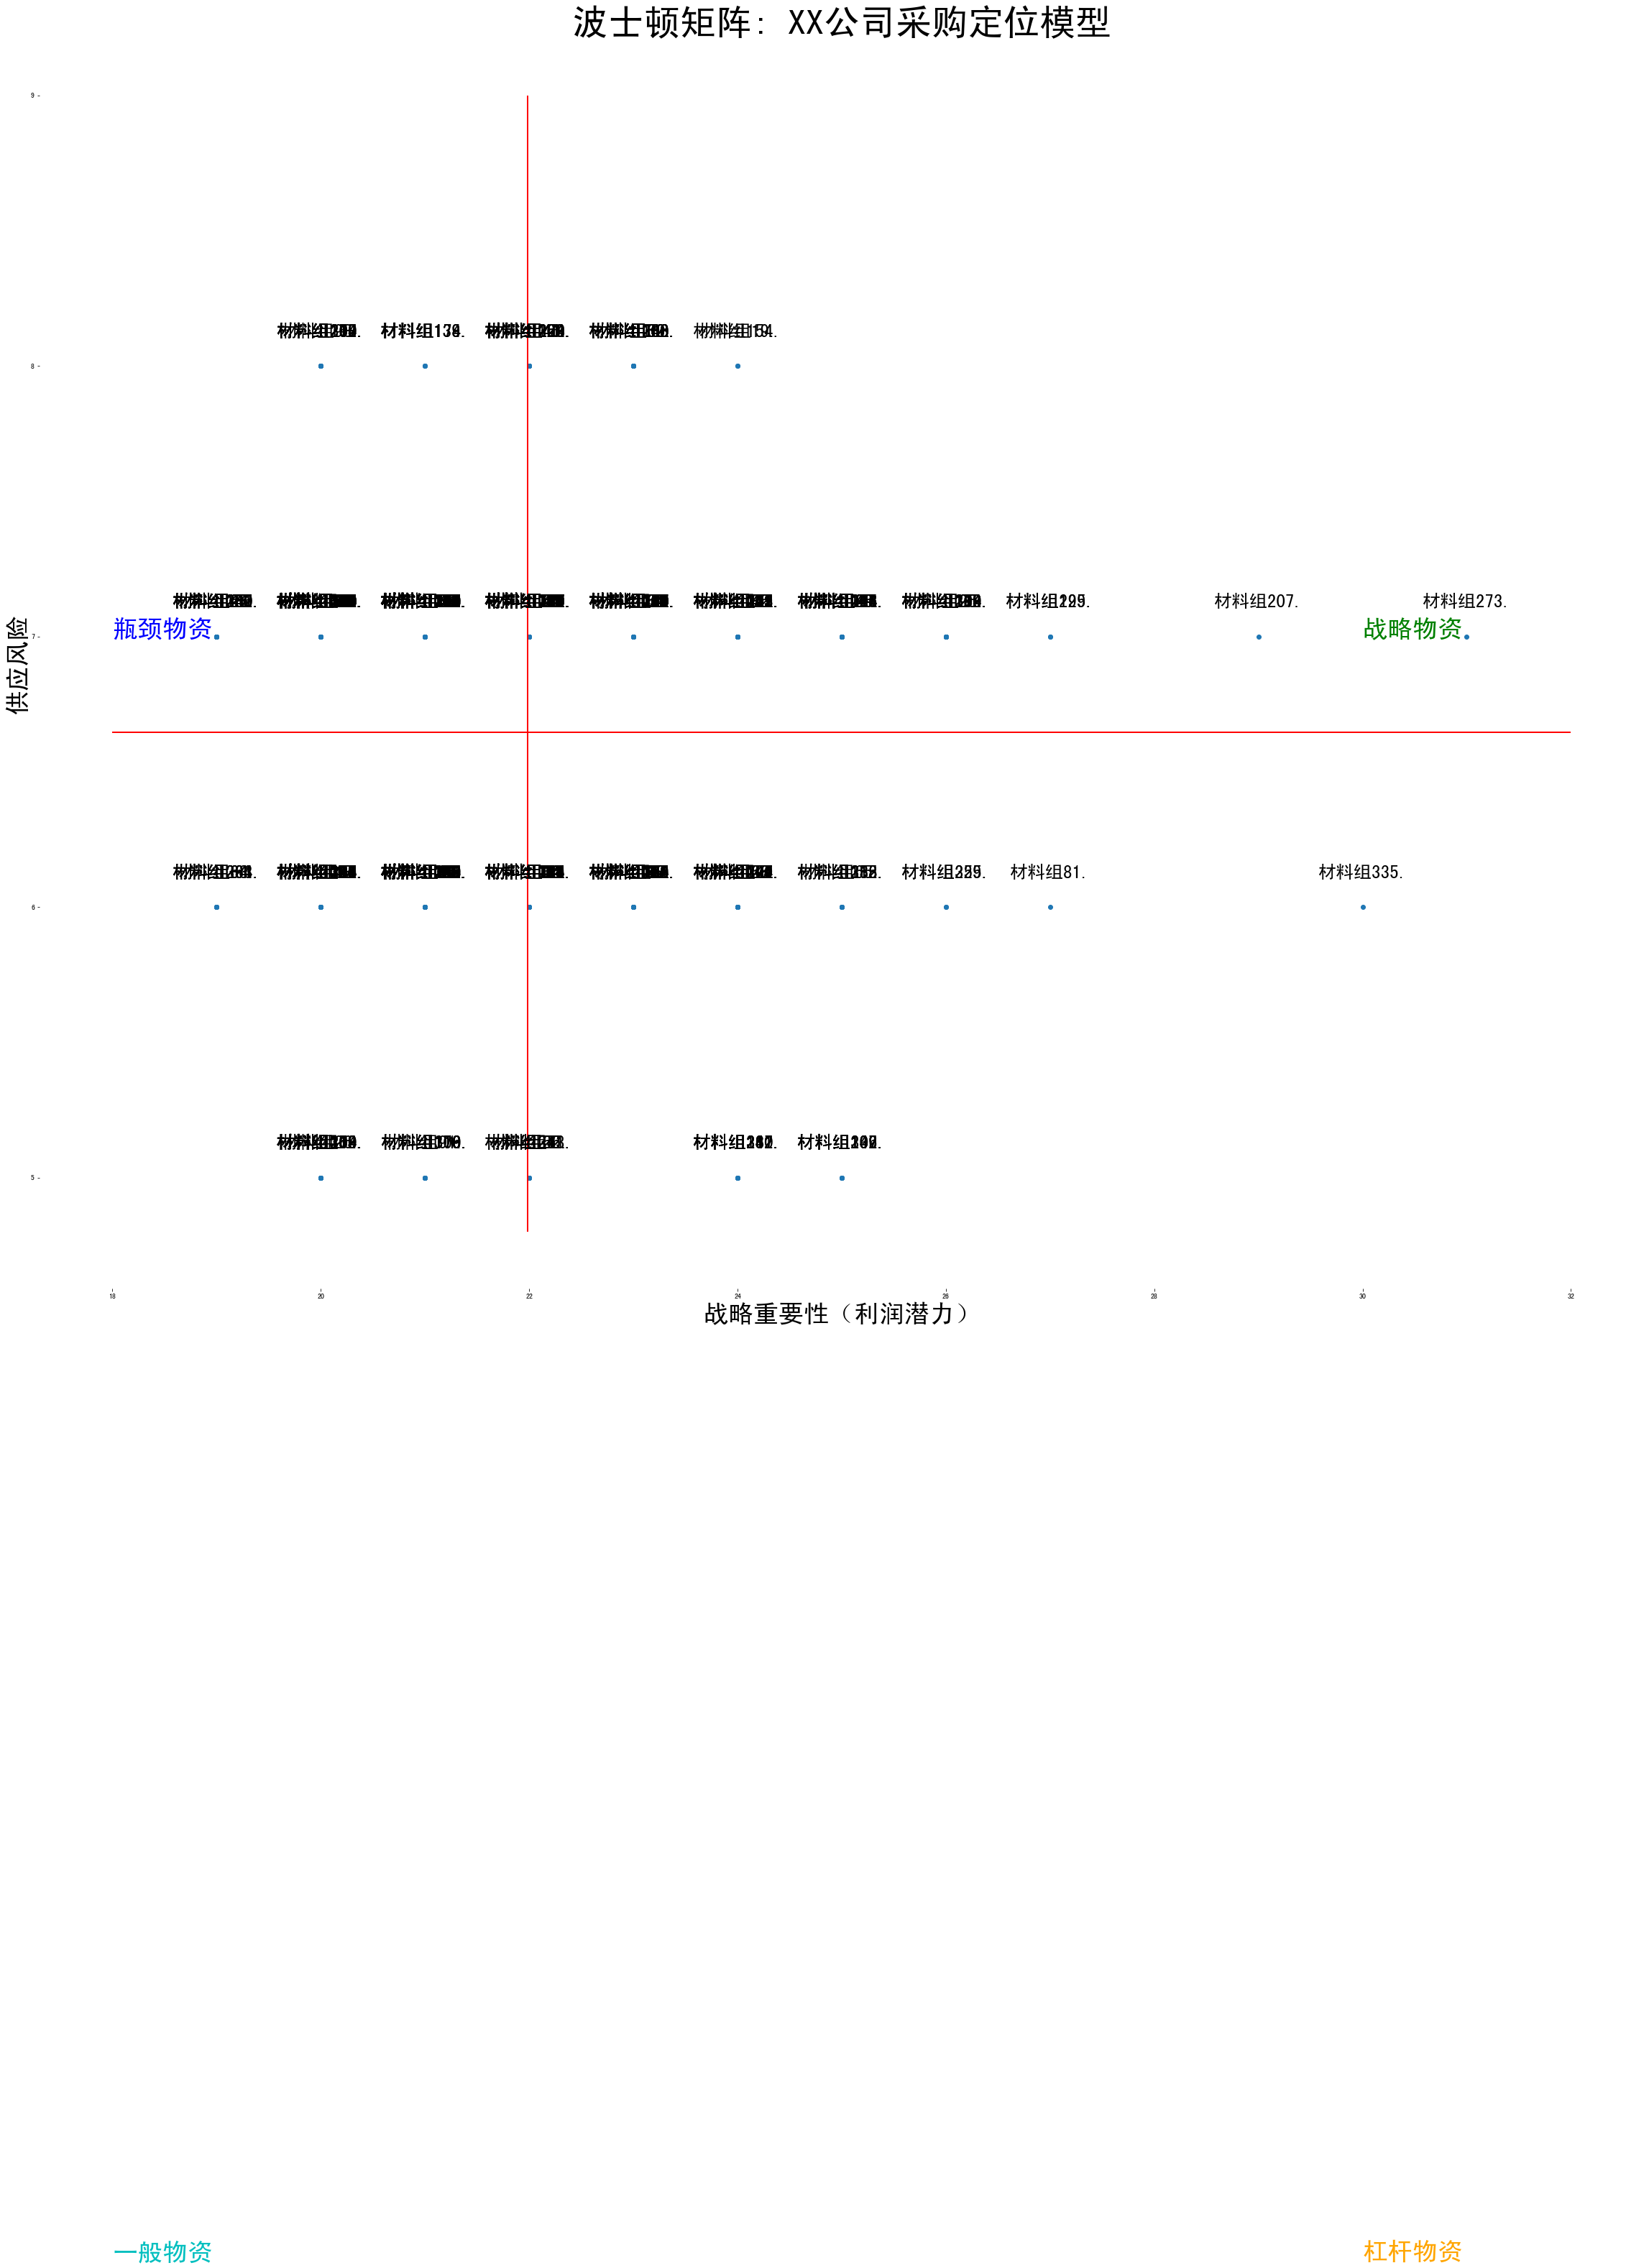

In [7]:
f = plt.figure(figsize=(40, 32))
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.scatter(x, y)
plt.xlabel('战略重要性（利润潜力）', fontsize=35)
plt.ylabel('供应风险', fontsize=35)
plt.title('波士顿矩阵: XX公司采购定位模型', fontsize=50)

# 对散点图中的每一个点进行文字标注
for a, b, l in zip(x, y, label):
    plt.text(a, b+0.1, '%s.' % l, ha='center', va='bottom', fontsize=25)
    #  0.1 向上轻微偏移
    
# 添加特定分割线
 ## vlines: vertical 垂直于 x 轴的线，在变量'经济总量'的均值处开始画，
   ## y 轴的范围[1.5, 3]
plt.vlines(x=money_score.mean(), ymin=4.8, ymax=9, color='r', linewidth=2)
plt.hlines(y=risk_score.mean(), xmin=18, xmax=32, color='r', linewidth=2) # 使用中位数 很多材料压在红色的线轴上，所以使用平均值

# plt.grid(True) # 背景wangge

# 定制需求：隐去四周的边框线条
sns.despine(trim=True, left=True, bottom=True)

plt.text(30, 7, '战略物资', fontsize=35, color='green')
plt.text(30, 1, '杠杆物资', fontsize=35, color='orange')
plt.text(18, 7, '瓶颈物资', fontsize=35, color='blue')
plt.text(18, 1, '一般物资', fontsize=35, color='c')

In [12]:
f.savefig('XX公司物料采购定位模型.png', dpi=150)

### 物资分类

In [76]:
money_mean = data['score_y'].mean()
risk_mean = data['score_x'].mean()

# 打标签
# data['category'] = np.where((row['score_y'] > money_mean) & (row['score_y'] > risk_mean), 1, 0)

for index, row in data.iterrows():
    if (row['score_y'] > money_mean) & (row['score_y'] > risk_mean):
        row['category'] = '战略物资'
    elif (row['score_y'] > money_mean) & (row['score_y'] < risk_mean):
        row['category'] = '杠杆物资'
    elif (row['score_y'] < money_mean) & (row['score_y'] > risk_mean):
        row['category'] = '瓶颈物资'
    elif (row['score_y'] < money_mean) & (row['score_y'] < risk_mean):
        row['category'] = '一般物资'
# Python DataFrame中 打标签/归类 的6种方法:https://zhuanlan.zhihu.com/p/88145761

In [77]:
data

,Unnamed: 0_x,risk1,risk2,risk3,risk4,risk5,risk6,risk7,risk8,risk9,risk10,risk11,risk12,risk13,risk14,risk15,risk16,risk17,risk18,risk19,risk20,risk21,risk22,risk23,risk24,bin_risk1,bin_risk2,bin_risk3,bin_risk4,bin_risk5,bin_risk6,bin_risk7,bin_risk8,bin_risk9,bin_risk10,bin_risk11,bin_risk12,bin_risk13,bin_risk14,bin_risk15,bin_risk16,bin_risk17,bin_risk18,bin_risk19,bin_risk20,bin_risk21,bin_risk22,bin_risk23,bin_risk24,risk_target,score_x,material_group_name,Unnamed: 0_y,money1,money2,money3,money4,money5,money6,money7,money8,money9,bin_money1,bin_money2,bin_money3,bin_money4,bin_money5,bin_money6,bin_money7,bin_money8,bin_money9,money_target,score_y
0,0,417,699,126,225,201,277,747,108,655,50,789,518,794,182,738,461,976,938,165,688,721,181,374,150,"(366.2, 467.5]","(583.0, 699.0]","(102.9, 189.0]","(216.8, 314.1]","(116.5, 212.6]","(270.5, 384.6]","(707.3, 795.6]","(102.6, 201.8]","(605.4, 702.5]","(2.999, 78.8]","(786.6, 895.1]","(428.4, 528.5]","(793.2, 907.1]","(176.4, 251.7]","(719.6, 796.8]","(394.2, 523.5]","(908.2, 997.0]","(885.5, 998.0]","(107.9, 222.4]","(671.6, 779.2]","(690.6, 821.8]","(109.7, 192.8]","(373.6, 451.5]","(90.9, 197.8]",0,5,材料组1,0,21,86,466,287,536,206,191,747,524,"(0.999, 62.8]","(68.7, 186.0]","(429.6, 530.5]","(226.8, 352.1]","(481.5, 577.8]","(182.4, 261.0]","(120.8, 191.8]","(711.3, 812.2]","(464.0, 575.6]",0,20
1,1,685,990,489,765,665,857,713,869,425,474,645,656,697,100,33,291,28,768,78,24,608,936,62,745,"(593.0, 696.3]","(890.0, 999.0]","(406.0, 489.5]","(705.8, 798.2]","(598.2, 680.9]","(827.4, 930.0]","(707.3, 795.6]","(788.2, 877.0]","(414.0, 504.0]","(368.6, 488.5]","(594.8, 688.0]","(615.6, 704.3]","(605.0, 721.6]","(92.8, 176.4]","(2.999, 82.7]","(279.7, 394.2]","(3.999, 105.8]","(763.4, 885.5]","(8.999, 107.9]","(3.999, 119.0]","(591.0, 690.6]","(899.5, 999.0]","(3.999, 84.9]","(716.6, 802.0]",1,4,材料组2,1,836,307,207,302,386,709,745,87,105,"(790.0, 890.1]","(284.4, 367.2]","(117.9, 226.8]","(226.8, 352.1]","(366.6, 481.5]","(689.6, 781.0]","(653.3, 765.8]","(3.999, 110.9]","(92.0, 198.8]",0,20
2,2,983,750,328,773,855,778,327,351,659,98,249,844,549,676,847,966,404,855,715,113,332,452,990,737,"(886.0, 999.0]","(699.0, 804.6]","(290.1, 406.0]","(705.8, 798.2]","(849.4, 994.0]","(711.6, 827.4]","(239.8, 336.4]","(291.1, 396.0]","(605.4, 702.5]","(78.8, 145.6]","(188.0, 290.7]","(801.2, 893.1]","(506.5, 605.0]","(555.8, 676.0]","(796.8, 897.5]","(873.1, 997.0]","(394.6, 462.0]","(763.4, 885.5]","(664.0, 768.8]","(3.999, 119.0]","(287.0, 400.0]","(421.0, 505.5]","(905.1, 999.0]","(716.6, 802.0]",1,2,材料组3,2,438,654,612,250,712,344,706,20,68,"(426.5, 519.0]","(587.2, 695.9]","(530.5, 624.0]","(226.8, 352.1]","(685.2, 796.0]","(261.0, 345.8]","(653.3, 765.8]","(3.999, 110.9]","(2.999, 92.0]",0,20
3,3,638,428,5,480,436,227,950,63,749,696,464,485,409,669,811,701,275,711,666,705,821,391,417,90,"(593.0, 696.3]","(384.6, 480.0]","(2.999, 102.9]","(400.8, 498.0]","(416.6, 515.5]","(170.4, 270.5]","(909.2, 997.0]","(0.999, 102.6]","(702.5, 794.6]","(685.5, 750.2]","(401.6, 514.5]","(428.4, 528.5]","(406.4, 506.5]","(555.8, 676.0]","(796.8, 897.5]","(617.8, 701.3]","(185.8, 287.6]","(640.3, 763.4]","(664.0, 768.8]","(671.6, 779.2]","(690.6, 821.8]","(302.0, 421.0]","(373.6, 451.5]","(0.999, 90.9]",1,5,材料组4,3,700,767,430,803,794,235,374,540,551,"(646.6, 790.0]","(695.9, 790.0]","(429.6, 530.5]","(729.2, 811.6]","(685.2, 796.0]","(182.4, 261.0]","(288.0, 381.6]","(512.0, 616.4]","(464.0, 575.6]",0,23
4,4,74,364,749,692,208,554,644,933,219,901,992,887,489,177,725,745,95,845,254,941,35,61,272,856,"(1.999, 79.0]","(262.7, 384.6]","(714.3, 800.4]","(612.6, 705.8]","(116.5, 212.6]","(504.0, 617.6]","(617.0, 707.3]","(877.0, 999.0]","(198.4, 306.4]","(876.0, 992.0]","(895.1, 996.0]","(801.2, 893.1]","(406.4, 506.5]","(176.4, 251.7]","(719.6, 796.8]","(701.3, 778.2]","(3.999, 105.8]","(763.4, 885.5]","(222.4, 295.8]","(898.3, 997.0]","(3.999, 108.0]","(3.999, 109.7]","(265.7, 373.6]","(802.0, 890.2]",1,2,材料组5